# Heart Disease Prediction

# 1. Import Libraries

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# 2. Optional

In [2]:
# Optional

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# 3. Read Data

In [3]:
df_Heart = pd.read_csv("D:\Data Analytics\Project\Project 4\decision_tree\HeartDisease.csv")

In [4]:
df_Heart.head(10)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df_Heart.shape

(303, 14)

In [6]:
df_Heart.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

# 4. Data Analysis and Preparation

Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and prepare data to perform classification techniques:
1. Check data types. Ensure your data types are correct. Refer data definitions to validate
2. If data types are not as per business definition, change the data types as per requirement
3. Study summary statistics
4. Distribution of variables
5. Study correlation
6. Detect outliers
7. Check for missing values

**4.1 Check data types**

In [7]:
df_Heart.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

From the above output, it is clear to see that the data type of variables 'old_peak' is 'float64', and rest of the variables are identified as 'int64'.

But as per data attribute information we have, 'gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia' variables are categorical, which are wrongly interpreted as int64, so we convert these variables' data type to 'object'.

# 4.2 Change the data types as per requirement

In [8]:
df_Heart[['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia']] = df_Heart[['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia']].astype('object')

In [9]:
df_Heart.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

**Splitting features and the target variable**

In [10]:
# SPlitting the features

df_features = df_Heart.iloc[:,df_Heart.columns != 'target']

In [11]:
# df_target = df_Heart.iloc[:,df_Heart.columns == 'target']

# We can either use the above code or below to seperate the Target variable

df_target = df_Heart.target

df_target.head (5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# 4.3 Study summary statistics

In [12]:
df_Heart.describe() # Provide summary of Int / Float variables

,age,rest_bps,cholestrol,thalach,old_peak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [13]:
df_Heart.describe(include = 'object')

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,2,0,2
freq,207,143,258,152,204,142,175,166


# 4.4 Distribution of variables

1. Distribution of numeric independent variables
2. Distribution of categoric independent variables
3. Distribution of dependent variable

**4.4.1 Distribution of numeric independent variables (Int / Float)**

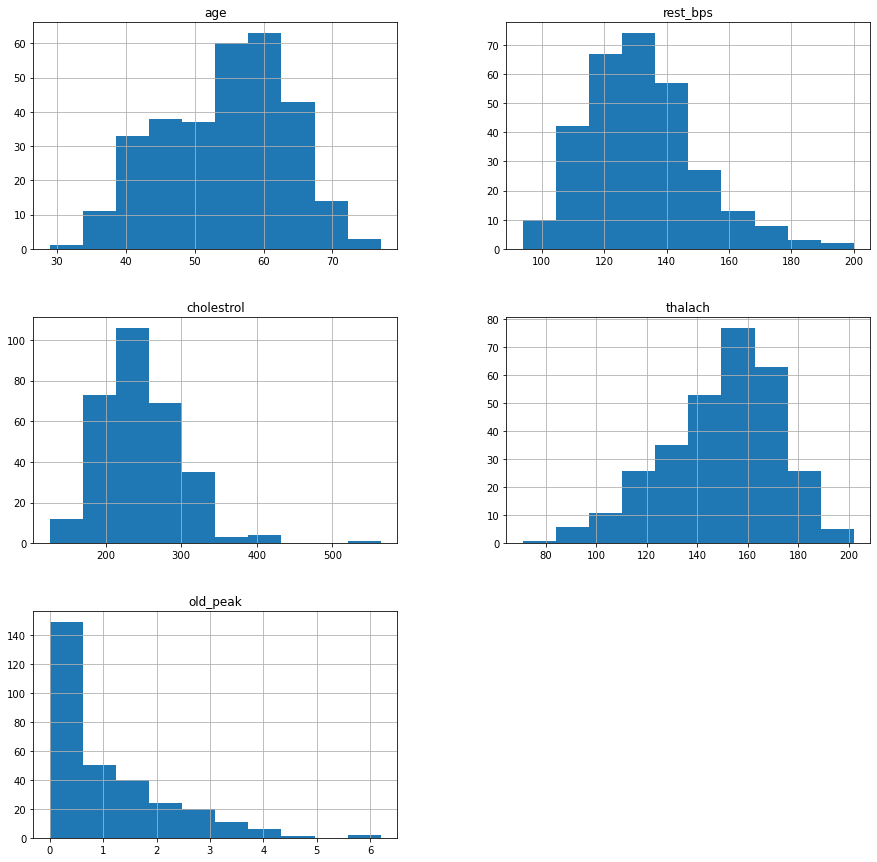

In [14]:
# Histogram plot displays the distribution of Int / Float variables

df_features.hist(figsize = (15,15))

plt.show()

It can be seen that the variable 'old_peak' is right-skewed and variables 'cholestrol' and 'rest_bps' have slight right skew, but not a very long right tail. They are almost near normally distrubuted. Only the variable 'thalach' is slightly left-skewed.

The variable which is near normally distributed is 'age'.

**4.4.2 Distribution of categoric independent variables**

In [15]:
# Segregating the categorical comuns

categorical = []

for col in df_features:
    if is_string_dtype(df_features[col]):
        categorical.append(col)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

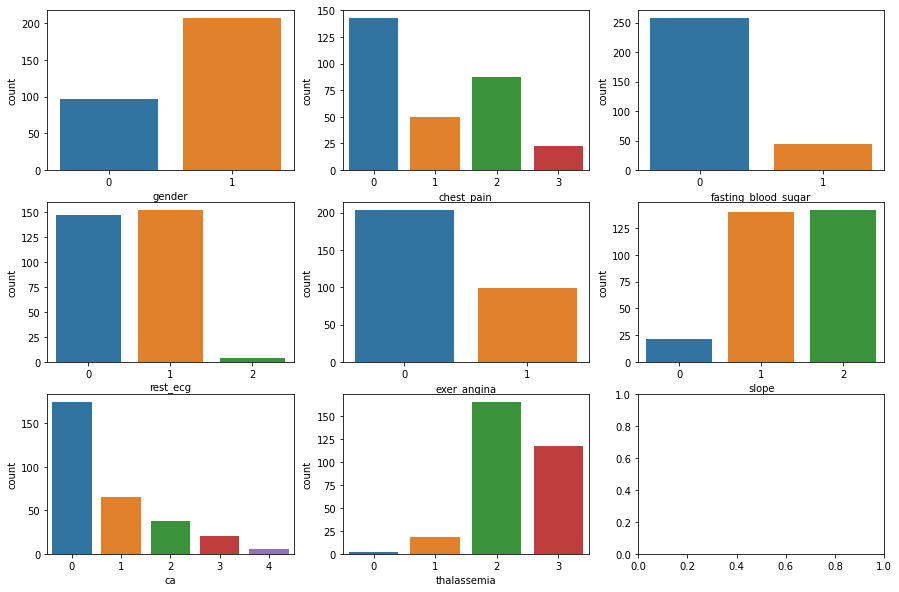

In [16]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))

for var, subplot in zip (categorical, ax.flatten()):
    sns.countplot(df_Heart[var], ax = subplot)
    
plt.show()

The variable 'ca' has 5 categories, variable 'chest_pain' and 'thalassemia' have 4 categories each, variables 'rest_ecg' and 'slope' have 3 categories each whereas the remaining variables have only two categories.

**4.4.3 Distribution of dependent / target variable**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

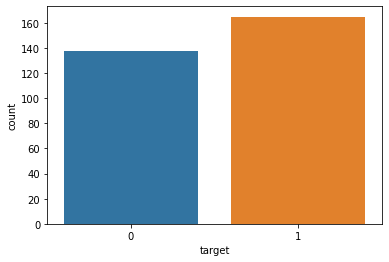

In [17]:
sns.countplot(df_target)

In [18]:
df_target.value_counts()

1    165
0    138
Name: target, dtype: int64

# 4.5 Correlation

To check the correlation between numerical variables, we perform the following steps:

1. Compute a correlation matrix
2. Plot a heatmap for the correlation matrix

**4.5.1 Compute a correlation matrix**

In [19]:
corr = df_features.corr()

corr

,age,rest_bps,cholestrol,thalach,old_peak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
rest_bps,0.279351,1.000000,0.123174,-0.046698,0.193216
cholestrol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
old_peak,0.210013,0.193216,0.053952,-0.344187,1.000000


**4.5.2 Plot a heatmap for the correlation matrix**

<AxesSubplot:>

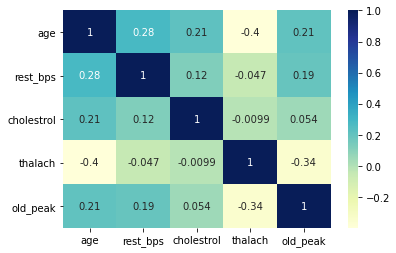

In [20]:
sns.heatmap(data = corr, annot = True, cmap = 'YlGnBu')

	
From the above heatmap, it can seen that the continuous variables are not highly correlated with each other since all the correlation coefficients are less than close to 0.5. The maximum positive correlation is 0.28 between 'age' and 'rest_bps'. Variable 'thalach' has a moderate negative correlation with variables 'age' (-0.4) and 'old_peak'(-0.34). It can be concluded that there is no multicollinearity in the data.

# 4.6 Detect Outliers

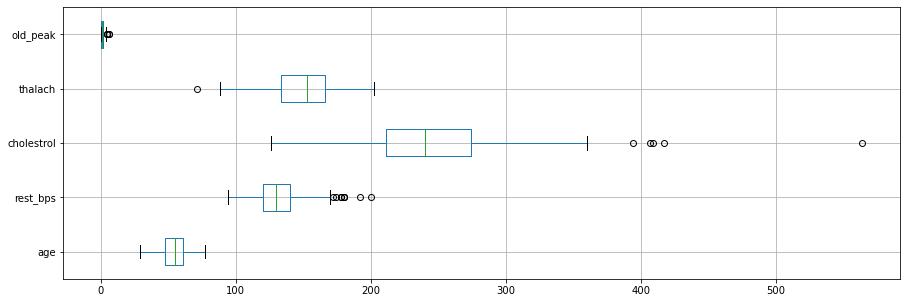

In [21]:
plt.figure(figsize = (15,5)) # (Length X Height)
df_features.boxplot(vert = False) # 'vert = False is used for horizontal ploting'
plt.show()

<AxesSubplot:>

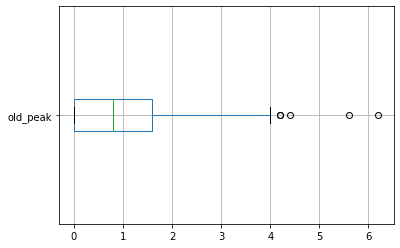

In [22]:
df_features.boxplot(column=['old_peak'],vert = False)

**Removing Outliers from the data**

From the above plot, we notice that for the variables 'rest_bps', 'cholestrol','thalach' and 'old_peak' there are points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

**Removing Outliers using IQR method**

In [23]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)

IQR = Q3 - Q1

IQR

age           13.5
rest_bps      20.0
cholestrol    63.5
thalach       32.5
old_peak       1.6
dtype: float64

In [24]:
    df_Heart = df_Heart[~((df_Heart < (Q1-1.5*IQR)) | (df_Heart > (Q3+1.5*IQR))).any(axis = 1)]

    df_Heart = df_Heart.reset_index(drop = True)

<ipython-input-24-2902354f538f>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Heart = df_Heart[~((df_Heart < (Q1-1.5*IQR)) | (df_Heart > (Q3+1.5*IQR))).any(axis = 1)]
<ipython-input-24-2902354f538f>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Heart = df_Heart[~((df_Heart < (Q1-1.5*IQR)) | (df_Heart > (Q3+1.5*IQR))).any(axis = 1)]


<AxesSubplot:>

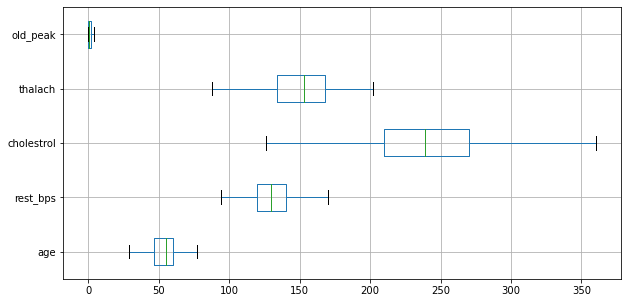

In [25]:
col = ['age','rest_bps','cholestrol','thalach','old_peak']

df_Heart[col].boxplot(figsize = (10,5), vert = False)

In [26]:
df_Heart.shape

(284, 14)

Observing the range of the boxplot, we say that the outliers are removed from the original data.

It is up to the discretion of the data scientist, to remove them or not; and maybe decide after evaluating the model performance.

# 4.7 Check missing values

In [27]:
Total = df_Heart.isnull().sum()
Total

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [28]:
Percent = (df_Heart.isnull().sum()*100/df_Heart.isnull().count())
Percent

age                    0.0
gender                 0.0
chest_pain             0.0
rest_bps               0.0
cholestrol             0.0
fasting_blood_sugar    0.0
rest_ecg               0.0
thalach                0.0
exer_angina            0.0
old_peak               0.0
slope                  0.0
ca                     0.0
thalassemia            0.0
target                 0.0
dtype: float64

<AxesSubplot:>

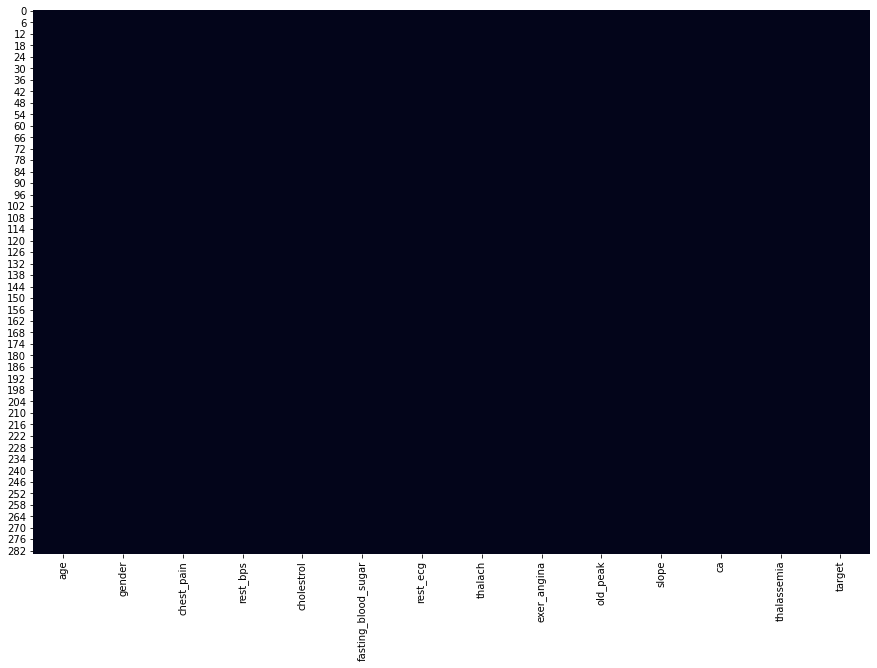

In [29]:
plt.figure(figsize = (15,10))
sns.heatmap(df_Heart.isnull(), cbar = False)

# 5. Prepare the Data

To dummy encode, we do the following:

1. Filter numerical and categorical variables
2. Dummy encode the categorical variables
3. Concatenate numerical and dummy encoded categorical variables
4. Splitting the Target Variable (y) and X

**5.1 Filter numerical and categorical variables**

In [30]:
# Display Categorical Variables

df_cat = df_Heart[categorical]
df_cat.head(10)

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
5,1,0,0,1,0,1,0,1
6,0,1,0,0,0,1,0,2
7,1,1,0,1,0,2,0,3
8,1,2,0,1,0,2,0,2
9,1,0,0,1,0,2,0,2


In [31]:
df_cat.shape

(284, 8)

In [32]:
df_num = df_Heart.select_dtypes(include = [np.number])
df_num.head(10)

,age,rest_bps,cholestrol,thalach,old_peak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
5,57,140,192,148,0.4,1
6,56,140,294,153,1.3,1
7,44,120,263,173,0.0,1
8,57,150,168,174,1.6,1
9,54,140,239,160,1.2,1


In [33]:
df_num.shape

(284, 6)

**5.2 Dummy encode the categorical variables**

In [34]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)
df_cat_dummies.head(10)

,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
5,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
9,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [35]:
df_cat_dummies.shape

(284, 17)

**5.3 Concatenate numerical and dummy encoded categorical variables**

In [36]:
df_Heart_dummy = pd.concat([df_num,df_cat_dummies], axis = 1)

In [37]:
df_Heart_dummy.head(10)

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,44,120,263,173,0.0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8,57,150,168,174,1.6,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
9,54,140,239,160,1.2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [38]:
df_Heart_dummy.shape

(284, 23)

**5.4 Splitting the Dummy Data as Target Variable (y) and X**

In [39]:
# Spliting the Target Variable as Dataframe

y = pd.DataFrame(df_Heart_dummy.target)
y.shape

(284, 1)

In [40]:
# Splitting X

X = df_Heart_dummy.drop('target', axis = 1) # Target column is dropped here.
X.shape

(284, 22)

In [41]:
X.columns

Index(['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak', 'gender_1',
       'chest_pain_1', 'chest_pain_2', 'chest_pain_3', 'fasting_blood_sugar_1',
       'rest_ecg_1', 'rest_ecg_2', 'exer_angina_1', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thalassemia_1', 'thalassemia_2',
       'thalassemia_3'],
      dtype='object')

**'X' is having set of Predictors and 'y' is having the Target for building the model**

# 6.A Building Model (Decision Tree)

To build a Decision Tree, we do the following:

1. Split the data into training and test sets
2. Build the model
3. Plot the decision tree
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

**6.1 Split the data into training and test sets**

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (198, 22)
y_train:  (198, 1)
X_test:  (86, 22)
y_test:  (86, 1)


**6.2 Build the model**

In [43]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree_model = decision_tree.fit(X_train, y_train)

**6.3 Plot the decision tree**

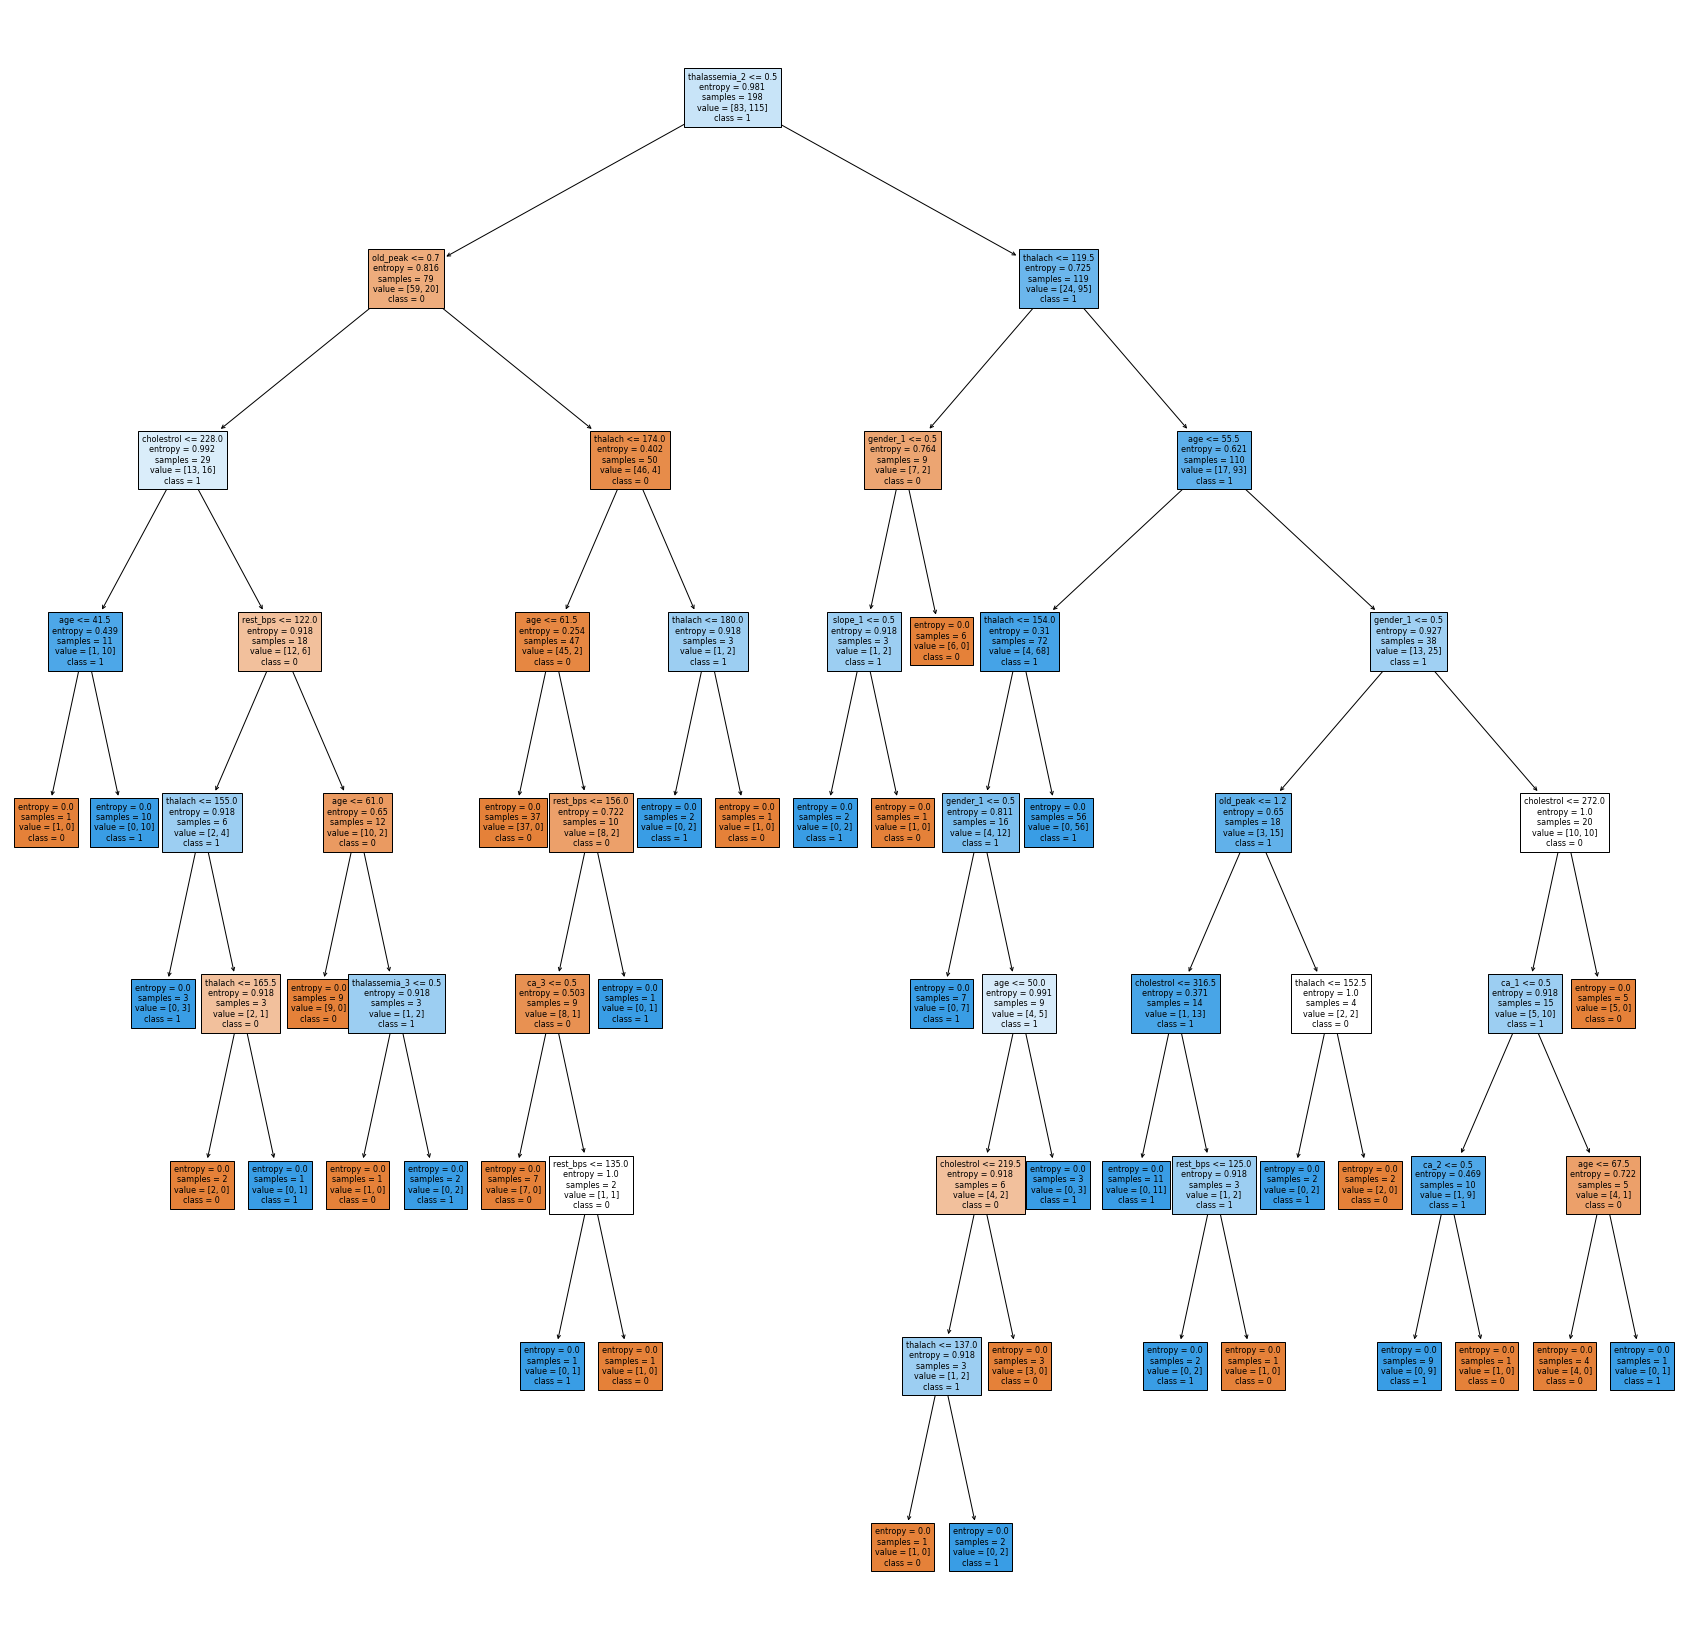

In [44]:
labels = X_train.columns

fig = plt.figure(figsize =(30,30))
_= tree.plot_tree(decision_tree_model, feature_names = labels, class_names =['0', '1'], filled = True, fontsize = 8)

**6.4 Do predictions on the Test Data**

In [45]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]

In [46]:
y_pred = decision_tree_model.predict(X_test)

In [47]:
y_pred_prob

array([1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0.])

In [48]:
y_pred.shape

(86,)

**6.5 Compute accuracy measures / Performance Metrics**

**> Performance Measures using Confusion Matrix**

In [49]:
confusion_matrix(y_test,y_pred)

array([[32, 10],
       [15, 29]], dtype=int64)

In [50]:
# Accuracy

(32+29)/86

0.7093023255813954

**> Performance Measures using ROC Curve (Receiver Operating Characteristic Curve)**

In [51]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob) 

Text(0, 0.5, 'True positive rate (Sensitivity)')

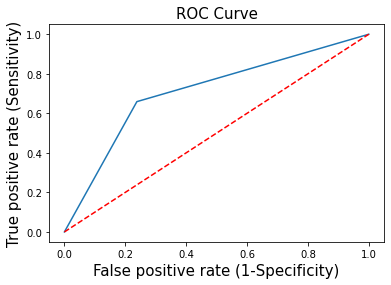

In [52]:
# Plot ROC curve

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

Finding AUC

In [53]:
# AUC is 71%
roc_auc_val = roc_auc_score(y_test,y_pred)
auc = round(roc_auc_val,4)
auc

0.7105

**> Performance Measures using Precision & Recall Curve on test set**

In [54]:
test_rep = classification_report(y_test,y_pred)
print(test_rep)

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        42
           1       0.74      0.66      0.70        44

    accuracy                           0.71        86
   macro avg       0.71      0.71      0.71        86
weighted avg       0.71      0.71      0.71        86



The accuracy is 71% for this model.

**> Kappa Score**

In [55]:
cohen_kappa_score(y_test,y_pred)

0.41985968699406373

**6.6 Tabulate the results**

In [56]:
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

score_card = score_card.append({'Model': 'DTree without Pruning',
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score':metrics.f1_score(y_test, y_pred),}, 
                                    ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,DTree without Pruning,0.710498,0.74359,0.659091,0.709302,0.41986,0.698795


# 6.B Prune a Decision Tree

	
Now prune the decision tree, we start with our original data set gradually proceeding with our analysis

To prune a 'Decision Tree', we do the following:

1. Prune the decision tree
2. Plot the decision tree
3. Do predictions on the test set
4. Compute accuracy measures
5. Tabulate the results

Here we prune the decision tree by giving random values for the maximum depth and maximum number of leaves of the tree. 
(There are technique to find the Hyperparameters, which will discuss below)

**6.1 Prune the decision tree**

In [57]:
prune = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 25, random_state = 10)

In [58]:
decision_tree_prune = prune.fit(X_train,y_train)

**6.2 Plot the decision tree**

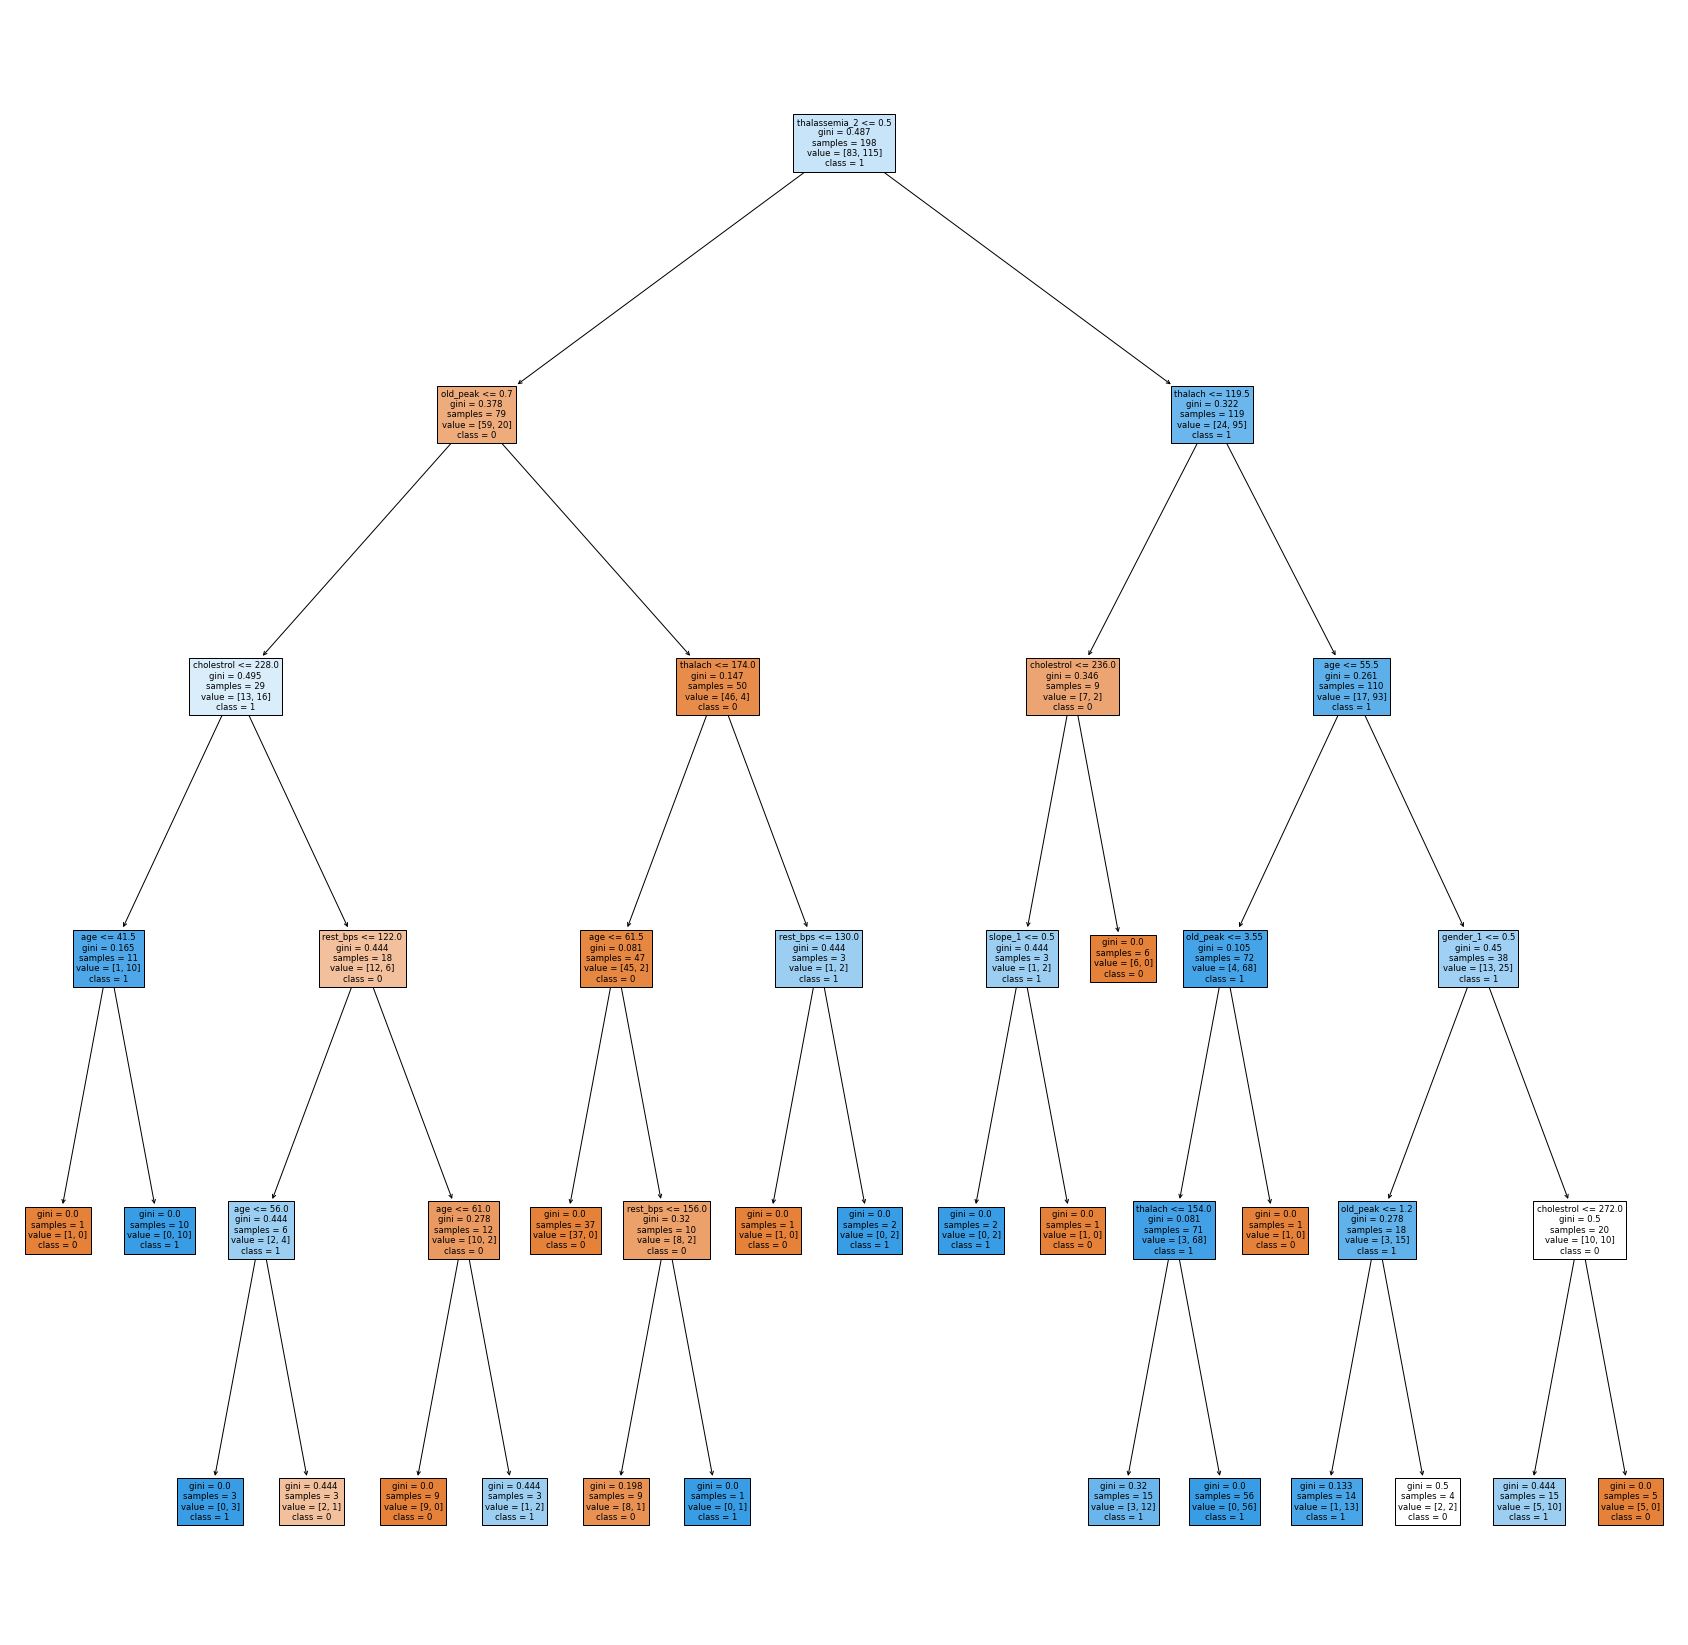

In [59]:
fig = plt.figure(figsize = (30,30))
_ = tree.plot_tree(decision_tree_prune, feature_names = labels, class_names = ['0','1'], filled = True)

**6.3 Predictions on the test set**

In [60]:
y_pred_prob_prune = decision_tree_prune.predict_proba(X_test)[:,1]

In [61]:
y_pred_prune = decision_tree_prune.predict(X_test)
y_pred_prune.shape

(86,)

**6.4  Compute accuracy measures / Performance Metrics**

**> Performance Measures using Confusion Matrix**

In [62]:
confusion_matrix(y_test,y_pred_prune)

array([[31, 11],
       [13, 31]], dtype=int64)

In [63]:
# Accuracy

62/86

0.7209302325581395

**> Performance Measures using ROC & AUC**

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_prune)

Ploting ROC Curve

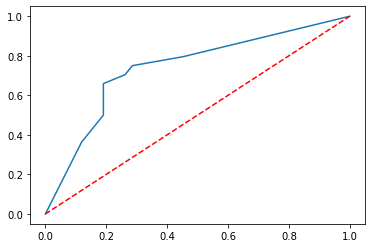

In [65]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')

AUC Score

In [66]:
roc_auc_prune = roc_auc_score(y_test, y_pred_prune)

In [67]:
round(roc_auc_prune,3)

0.721

**> Performance Measures using Precision & Recall Curve on test set / P-R Curve**

In [68]:
test_rpt_prune = classification_report(y_test, y_pred_prune)
print(test_rpt_prune)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.74      0.70      0.72        44

    accuracy                           0.72        86
   macro avg       0.72      0.72      0.72        86
weighted avg       0.72      0.72      0.72        86



**> Performance Measures using Kappa Score**

In [69]:
cohen_kappa_score(y_test, y_pred_prune)

0.4421621621621622

**6.5 Tabulate the results**

In [70]:
score_card = score_card.append({'Model': 'DTree with Random Pruning',
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob_prune),
                                    'Precision Score': metrics.precision_score(y_test, y_pred_prune),
                                    'Recall Score': metrics.recall_score(y_test, y_pred_prune),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred_prune),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred_prune),
                                    'f1-score':metrics.f1_score(y_test, y_pred_prune),}, 
                                    ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,DTree without Pruning,0.710498,0.743590,0.659091,0.709302,0.419860,0.698795
1,DTree with Random Pruning,0.738907,0.738095,0.704545,0.720930,0.442162,0.720930


# 6.C Decision Tree (using GridSearchCV)

Now we show how a decision tree is optimized by cross-validation, which is done using the GridSearchCV() from sklearn library.

The performance of the selected hyperparameters and trained model is then measured on the test set that was not used during the model building.

Now we build a decision tree using the GridSearchCV. We start with our original data set gradually proceeding with our analysis

To build a Decision Tree using GridSearchCV, we do the following:
1. Use GridSearch to obtain the optimal values of hyperparameters
2. Build the model using the hyperparameters obtained in step 1
3. Plot the decision tree
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

**6.1 Use GridSearch to obtain the optimal values of hyperparameters**

# Create a dictionary with Hyperparameters and its Values

tuned_parameters = [{'criterion':['gini','entropy'],
                    'min_samples_split': [10,20,30],
                    'max_depth': [3,5,7,9],
                    'max_samples_leaf': [15,20,25,30,35],
                    'max_leaf_nodes' : [5,10,15,20,25]}]

In [71]:
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [72]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

In [73]:
grid = GridSearchCV(estimator = decision_tree_classification, 
                    param_grid = tuned_paramaters, 
                    cv = 10)

In [74]:
decision_tree_grid = grid.fit(X_train,y_train)

In [75]:
print('Best parameters for decision tree classifier: ', decision_tree_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 25, 'min_samples_split': 10} 



**6.2 Build the model using the hyperparameters obtained**

In [76]:
prune_grid = DecisionTreeClassifier(criterion= 'gini', max_depth = 3, max_leaf_nodes = 5, min_samples_leaf = 25,
                                    min_samples_split = 10 ,random_state = 10)

In [77]:
dtree_grid_model = prune_grid.fit(X_train, y_train)

**6.3 Plot the decision tree**

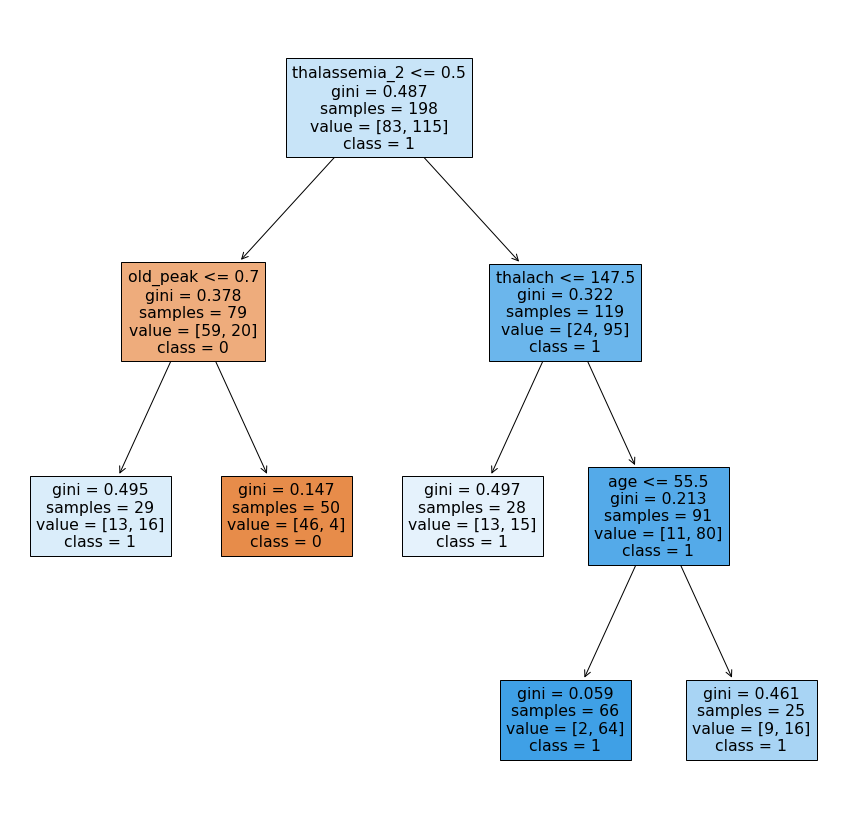

In [78]:
labels = X_train.columns

fig = plt.figure(figsize = (15,15))
_ = tree.plot_tree(dtree_grid_model , feature_names = labels, class_names = ['0','1'], filled = True)

**6.4 Do predictions on the test set**

In [79]:
y_pred = dtree_grid_model.predict(X_test)

In [80]:
y_pred_prob = dtree_grid_model.predict_proba(X_test)[:,1]

**6.5 Compute accuracy measures**

**ROC & AUC**

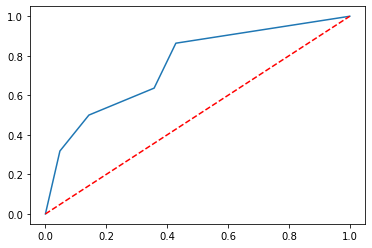

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')

In [82]:
auc_val_grid = roc_auc_score(y_test, y_pred_prob)

round(auc_val_grid,4)

0.7543

**P-R Curve**

In [83]:
pr_grid = classification_report(y_test, y_pred)

print(pr_grid)

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        42
           1       0.68      0.86      0.76        44

    accuracy                           0.72        86
   macro avg       0.74      0.72      0.71        86
weighted avg       0.74      0.72      0.71        86



**Kappa Score**

In [84]:
cohen_kappa_score(y_test, y_pred)

0.43790849673202614

**6.6 Tabulate the results**

In [85]:
score_card = score_card.append({'Model': 'DTree with GridSearchCV Pruning',
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score':metrics.f1_score(y_test, y_pred),}, 
                                    ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,DTree without Pruning,0.710498,0.743590,0.659091,0.709302,0.419860,0.698795
1,DTree with Random Pruning,0.738907,0.738095,0.704545,0.720930,0.442162,0.720930
2,DTree with GridSearchCV Pruning,0.754329,0.678571,0.863636,0.720930,0.437908,0.760000


**The above table shows that the Decision Tree (GridSearchCV) has the highest values for most of the performance measures like AUC Score, Recall, f1-score, accuracy. Therefore, it can be concluded that the Decision Tree (GridSearchCV) can be used to predict the existence of heart disease in the patients. In future when we have more observations or bigger dataset and we can also apply ensemble techniques for prediction that can be tested again.**